Example 2.5
===========

This notebook is available on github
[here](https://github.com/aezarebski/aas-extended-examples). If you find
errors or would like to suggest an improvement, feel free to create an
issue.

As usual we will start by importing some useful libraries.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os.path as path

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In this notebook we will also use an additional module, `heatmap`, which provides a function for drawing heatmaps of the correlations between columns of a pandas dataframe. If you are using Colab please refer to the next cell which shows how to load a remote version of the module and data.

In [ ]:
assert path.exists('heatmap.py')
from heatmap import correlation_heatmap

AssertionError: 

If you are running this notebook somewhere without access to `heatmap.py` then the following snippet will download a copy of it and use that.

In [2]:
assert not path.exists('heatmap.py')

import requests
#pull data from github 
heatmap_py_url = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-2.5/heatmap.py'
req = requests.get(heatmap_py_url)

with open('urlheatmap.py', 'w') as f:
    f.write(req.text)
    
from urlheatmap import correlation_heatmap

The data in `data-auto.csv` is a popular dataset of car characteristics. In this notebook we will be looking at the miles per gallon (MPG) achieved by these cars based on some features of the cars and where/when they were produced. The `origin` of the car is encoded as an integer, (recall you can use the `dtypes` method to see this). The representation of the data is clearer by mapping it to a string describing the origin.

In [26]:
data_csv = 'data-auto.csv'
if not path.exists(data_csv):
    data_csv = 'https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-2.5/data-auto.csv'
df = pd.read_csv(data_csv)

In [27]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [28]:
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Japan'}) #we map the origin to the numbers 

In [29]:
col_names = df.columns.to_list() #turn the df columns to list and store it in col_names to filter 
numeric_cols = col_names[0:7] #slice only numeric columns 

A heatmap of the correlations between the variables in the data is a good way to get a feel for the data.

TypeError: ignored

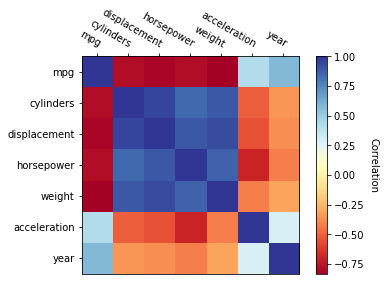

In [30]:
correlation_heatmap(df[numeric_cols]) #find the correlation between each variable 
plt.show()
#variables are correlated with each other 

<Figure size 432x288 with 0 Axes>

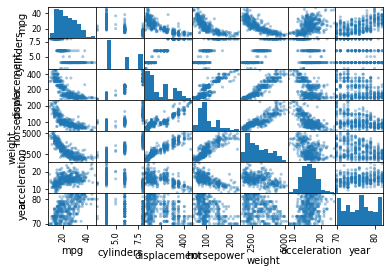

In [31]:
plt.figure()
pd.plotting.scatter_matrix(df[numeric_cols], alpha = 0.4) #take only the numeric columns and plot the correlation between them
plt.show()

### Question

What do you notice about `cylinders`, `displacement`, `horsepower` and `weight`?

### Answer

These variables are all highly correlated with each other and decreasing MPG; given what we know about cars this also makes sense from a mechanical perspective.

### Question

Fit an ordinary linear regression for the MPG using all of the variables (excluding the name of the car). Print a summary of the fitted model. Comment on the results, how has the MPG changed over time?

### Answer

In [32]:
form_1 = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'
fit_1 = smf.ols(formula = form_1, data = df).fit()  #find the OLS of the variables 
fit_1.summary()
#displacement has the wrong sign there because it is highly correlated 
#condition number is large, can't trust the inverse of the matrix, means you have multicolliearity - way to improve this is to remove one of the variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          1.79e-139
Time:                        10:17:53   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.9546      4.677     -3.839      0.000     -27.150      -8.759
origin[T.Europe]     2.6300      0.566      4.643      0.000       1.516       3.744
origin[T.Japan]      2.8532      0.553      5.162      0.000       1.766       3.940
cylinders           -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement         0.0240      0.008      3.133      0.002       0.009       0.039
horsepower          -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight              -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration         0.0791      0.098      0.805      0.421      -0.114       0.272
year                 0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Question

Plot the residuals against the fitted values, what do you notice?

### Answer

There is some clear non-linearity and the variance is not constant.

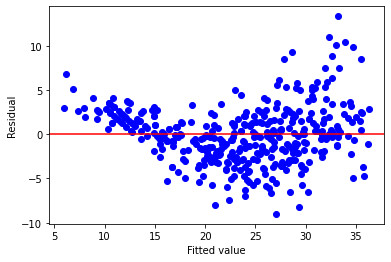

In [33]:
def make_fittedvalues_resid_plot(fit):
    plt.figure()
    plt.scatter(fit.fittedvalues, fit.resid, color='b') #plot the residual values against the fitted values, using the fit object from the OLS
    plt.axhline(y=0, color='r') #add in a red line through 0 
    plt.xlabel("Fitted value")
    plt.ylabel("Residual")
    return

#triangle > hetroscadicity 
#banana > non-linearity 
#weird > non-independenc  

make_fittedvalues_resid_plot(fit_1)
plt.show()

### Question

Did you get any warnings when you fitted the model? How might you resolve them?

### Answer

Some of the predictors are very highly correlated which can lead to numerical problems. Since they contain almost the same information, removing them will not change the model fit much. For example, removing `cylinders` as a predictor hardly changes the result. The same could be said for acceleration.

In [35]:
form_2 = 'mpg ~ displacement + horsepower + weight + year + origin' #remove the predictors that has collinearity to make it more simple 
fit_2 = smf.ols(formula = form_2, data = df).fit()
fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     297.9
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          2.80e-141
Time:                        10:42:14   Log-Likelihood:                -1022.0
No. Observations:                 392   AIC:                             2058.
Df Residuals:                     385   BIC:                             2086.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.5036      4.160     -4.207      0.000     -25.683      -9.324
origin[T.Europe]     2.5958      0.567      4.581      0.000       1.482       3.710
origin[T.Japan]      2.7722      0.551      5.033      0.000       1.689       3.855
displacement         0.0155      0.006      2.699      0.007       0.004       0.027
horsepower          -0.0230      0.011     -2.149      0.032      -0.044      -0.002
weight              -0.0066      0.001    -11.449      0.000      -0.008      -0.005
year                 0.7749      0.052     14.986      0.000       0.673       0.877
==============================================================================
Omnibus:                       24.729   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.452
Skew:                           0.455   Prob(JB):                     7.37e-09
Kurtosis:                       4.211   Cond. No.                     7.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

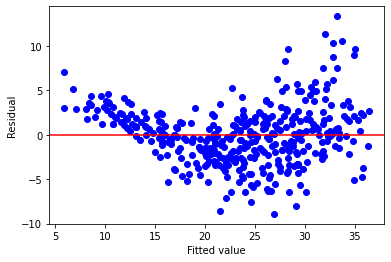

In [36]:
make_fittedvalues_resid_plot(fit_2) #residual is the same, but the condition number is reduce from 87,000 to 77,000 instead 
plt.show()

### Question

Apply some transforms to reduce non-linearities in the relationship between the predictors and the response.

Transformation 
> Xˆ2, log(x) and square root of X

> if you transform it you have to interpret it in the transformed way 

### Answer

Looking at the scatter plots, we can see that the `displacement`, `horsepower` and `weight` all appear to have a non-linear relationship. To adjust for this we can log-transform these variables.

<Figure size 432x288 with 0 Axes>

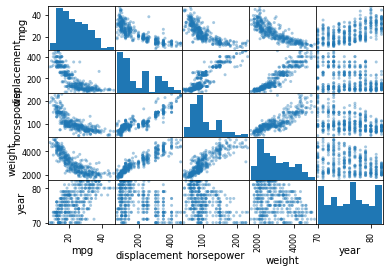

In [37]:
plt.figure()
pd.plotting.scatter_matrix(df[['mpg',
 'displacement',
 'horsepower',
 'weight',
 'year']], alpha = 0.4)
plt.show()

<Figure size 432x288 with 0 Axes>

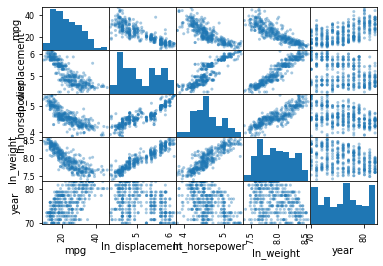

TypeError: ignored

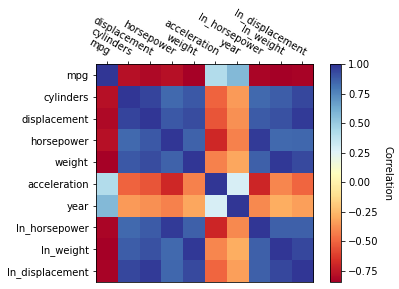

In [41]:
df['ln_weight'] = np.log(df.weight)
df['ln_horsepower'] = np.log(df.horsepower)
df['ln_displacement'] = np.log(df.displacement)

plt.figure()
pd.plotting.scatter_matrix(df[['mpg',
 'ln_displacement',
 'ln_horsepower',
 'ln_weight',
 'year']], alpha = 0.4)
plt.show()

correlation_heatmap(df[numeric_cols + ['ln_horsepower','ln_weight', 'ln_displacement']])
plt.show()

### Question

Re-fit the model with the transformed variables and comment on what has changed. Do you need all of the variables?

### Answer

We can further improve the model by using the log-transformed variables, and we can get a simpler model with the same predictive power by ignoring the `displacement`.

In [42]:
form_3 = 'mpg ~ ln_horsepower + ln_weight + year + origin' #find the ols with the transformed varaibles instead 
fit_3 = smf.ols(formula = form_3, data = df).fit()
fit_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     424.2
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          2.37e-154
Time:                        10:48:45   Log-Likelihood:                -994.47
No. Observations:                 392   AIC:                             2001.
Df Residuals:                     386   BIC:                             2025.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          105.5874      7.949     13.284      0.000      89.960     121.215
origin[T.Europe]     1.4187      0.483      2.936      0.004       0.469       2.369
origin[T.Japan]      1.6499      0.495      3.330      0.001       0.676       2.624
ln_horsepower       -3.0055      1.008     -2.981      0.003      -4.988      -1.023
ln_weight          -15.7543      1.283    -12.280      0.000     -18.277     -13.232
year                 0.7431      0.047     15.680      0.000       0.650       0.836
==============================================================================
Omnibus:                       38.462   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.743
Skew:                           0.586   Prob(JB):                     4.35e-16
Kurtosis:                       4.720   Cond. No.                     3.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

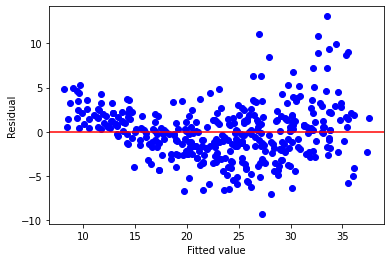

In [43]:
make_fittedvalues_resid_plot(fit_3) #new residual is slightly better, not a banana shape 
plt.show()

### Question

Include an interaction term between the origin of the cars and their year or release. What does this tell you about car manufactoring in the considered regions?

### Answer

We see that Europe and Japan are improving their efficiency faster than America.

In [46]:
form_3 = 'mpg ~ ln_horsepower + ln_weight + year + origin' 
form_4 = form_3 + ' + origin * year' #include a new variable in the predictor, account for two of these variable together 
fit_4 = smf.ols(formula = form_4, data = df).fit()
fit_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     323.2
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          1.16e-156
Time:                        10:56:53   Log-Likelihood:                -982.84
No. Observations:                 392   AIC:                             1982.
Df Residuals:                     384   BIC:                             2013.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               126.0011      8.829     14.271      0.000     108.642     143.360
origin[T.Europe]        -37.9652      9.303     -4.081      0.000     -56.255     -19.675
origin[T.Japan]         -26.5470      8.444     -3.144      0.002     -43.149      -9.945
ln_horsepower            -2.8889      0.982     -2.943      0.003      -4.819      -0.959
ln_weight               -16.7962      1.267    -13.256      0.000     -19.287     -14.305
year                      0.5773      0.058      9.968      0.000       0.463       0.691
origin[T.Europe]:year     0.5168      0.122      4.231      0.000       0.277       0.757
origin[T.Japan]:year      0.3633      0.109      3.338      0.001       0.149       0.577
==============================================================================
Omnibus:                       29.464   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.633
Skew:                           0.462   Prob(JB):                     2.26e-12
Kurtosis:                       4.559   Cond. No.                     6.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

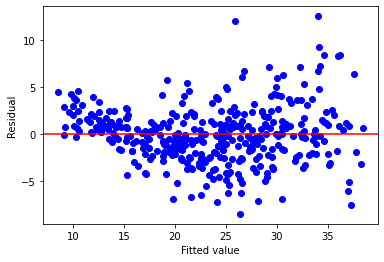

In [45]:
make_fittedvalues_resid_plot(fit_4)
plt.show()